# <FONT COLOR='BLUE'><B><CENTER>BREAST CANCER PREDICTION </CENTER></B></FONT>

## Taba de contenido
- [1 - Objetivos](#1)
- [2 - Importando las librerías necesarias](#2)
- [3 - Carga de datos](#3)
- [4 - Pre-procesamiento de datos](#4)
    - [4.1. - Inspección inicial](#4.1)
    - [4.2. - Tratando datos faltantes](#4.2)
    - [4.3. - Tratando con datos categóricos](#4.3)
    - [4.4. - Separando en conjuntos de entrenamiento y test](#4.4)
    - [4.5. - Escalado de características](#4.5)
- [5 - Modelos](#5)
    - [5.1. - Regresión Logística](#5.1)
    - [5.2. - SVM](#5.2)
    - [5.3. - Árboles de decisión](#5.3)
    - [5.4. - KNN](#5.3)
    - [5.5. - Red Neuronal](#5.3)
- [6 - Análisis de resultados](#6)
- [7 - Conclusiones](#7)





 


<a name="1"></a>
## <font color='green'> <b> 1. Objetivos </font> </b>

- Predecir la probabilidad de que el cancer sea maligno o benigno dados un conjunto de características.

- Practicarnos con diferentes clasificadores y compararlos.

<a name="2"></a>
## 2. Importando las librerías necesarias

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

<a name="3"></a>
## 3. Carga de datos

Utilizaremos el dataset de cáncer de seno de Wisconsin disponible en Kaggle.

In [2]:

df = pd.read_csv('data/data.csv',encoding='utf-8')

<a name="4"></a>
## 4. Pre-procesamiento de datos

<a name="4.1"></a>
### 4.1. Inspección inicial

Comencemos inspeccionando los datos.

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Veamos las dimensiones:

In [4]:
df.shape

(569, 33)

Ahora inspeccionemos las columnas:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Hay una columna llamada "Unnamed", no tiene mucho sentido tenerla, la eliminamos:

In [6]:
df = df.drop('Unnamed: 32', axis=1)

In [7]:
# separo los datos de la etiqueta
X = df.iloc[:, 2:]
Y = df.iloc[:, 1]

<a name="4.2"></a>
### 4.2. Tratando datos faltantes 

In [8]:
# vemos si hay nulos
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
# vemos si hay valores faltantes
X.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No hay valores faltantes en este dataset, por lo que no tendremos que preocuparnos por tratarlos.
<br>
No obstante, si los hubiera, tenemos distintas opciones para lidiar con ellos:
<br>

- Borrar las filas con esos valores (ej: df.dropna(axis=0))

- Borrar las columnas con esos valores (ej: df.dropna(axis=1))

- Reemplazar los valores faltantes, por ejemplo por la media (df.fillna(df.mean())) o usando algún estimador.

<a name="4.3"></a>
### 4.3. Tratando con datos categóricos

Debemos distinguir entre características:

- Ordinales: Existe un orden (ej: tamaños de camisetas).
- Nominales: No existe un orden (ej: colores)

En este problema sólo debemos codificar las etiquetas, pues el resto de las características ya son numéricas.

In [10]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y[:150]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

Puede apreciarse que ahora ya no tenemos M y B sino 1 y 0.

Mediante la transformación inversa podemos ver las etiquetas originales.

In [11]:
labelencoder_Y .classes_
list(labelencoder_Y .inverse_transform([0,1]))

['B', 'M']

<a name="4.4"></a>
### 4.4. Separación en conjuntos de entrenamiento y test

In [12]:
# separando en test y train (30, 70)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

<a name="4.5"></a>
### 4.5. Escalado de características

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a name="5"></a>
## 5. Modelos

Este es un problema supervisado de clasificación.
<br>
Probaremos entonces los siguientes modelos. <br>

- Regresión Logística

- SVM

- Decision Trees

- KNN

- Neural Network


Previamente, inicializaremos una lista que nos servirá para ir guardando los resultados obtenidos con cada uno.

In [14]:
results = {}

A su vez, definiremos funciones ayudantes que nos permitirán imprimir la matriz de confusión.

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    


# imprimir para las predicciones dadas por el modelo en particular
def confusion_matrix_per_model(y_test,y_pred):
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred )
    np.set_printoptions(precision=2)
    print (classification_report(y_test, y_pred))
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Benign','Malignant'],normalize= False,title='cm')

<a name="5.1"></a>
### 5.1. Regresión Logística

Ajustamos el modelo, realizamos predicciones y medimos la precisión.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)


# realizamos las predicciones
y_pred_LR = lr.predict(X_test)

# medimos la exactitud
accuracy_LR = accuracy_score(y_test, y_pred_LR)

# guardamos el resultado
results['LR']=accuracy_LR


Veamos la matriz de confusión.

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Confusion matrix, without normalization
[[107   1]
 [  3  60]]


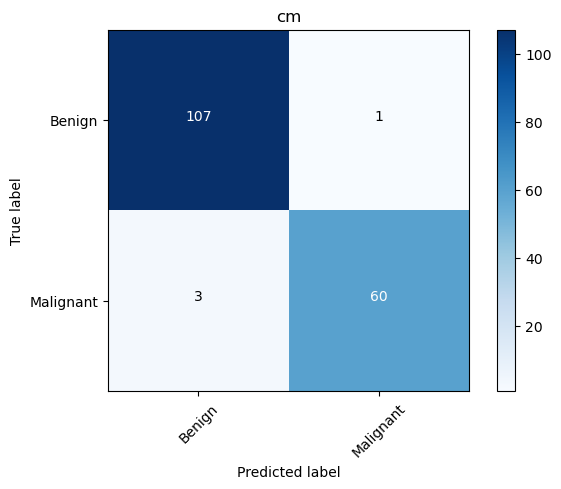

In [17]:
confusion_matrix_per_model(y_test,y_pred_LR)

<a name="5.2"></a>
### 5.2. SVM

In [18]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


# realizamos las predicciones
y_pred_SVM = classifier.predict(X_test)

# medimos la precisión
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

# guardamos el resultado
results['SVM'] = accuracy_SVM



In [19]:
results

{'LR': 0.9766081871345029, 'SVM': 0.9590643274853801}

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion matrix, without normalization
[[103   5]
 [  2  61]]


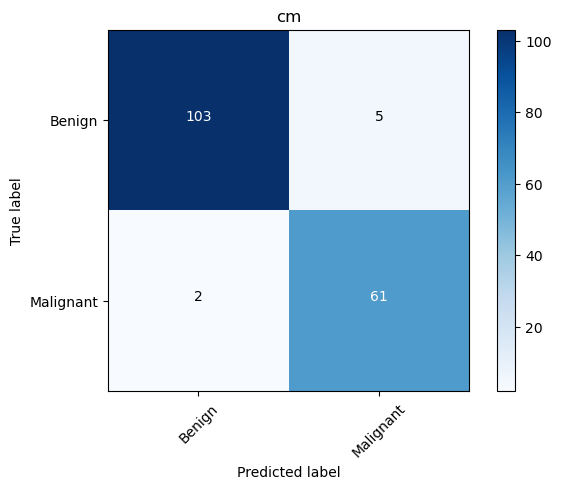

In [20]:
confusion_matrix_per_model(y_test,y_pred_SVM)

<a name="5.3"></a>
### 5.3. Árboles de decisión

In [21]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

tree_classifier = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

tree_classifier.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
# realizamos las predicciones
y_pred_tree = tree_classifier.predict(X_test)

# medimos la precisión
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# guardamos el resultado
results['Decision Tree'] = accuracy_tree


              precision    recall  f1-score   support

           0       0.98      0.94      0.96       108
           1       0.90      0.97      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Confusion matrix, without normalization
[[101   7]
 [  2  61]]


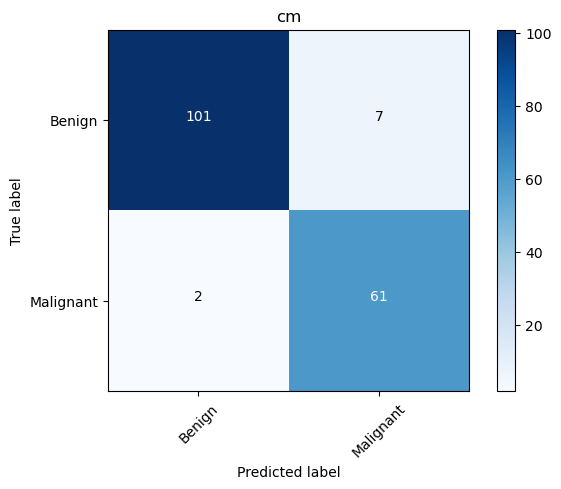

In [23]:
confusion_matrix_per_model(y_test,y_pred_tree)

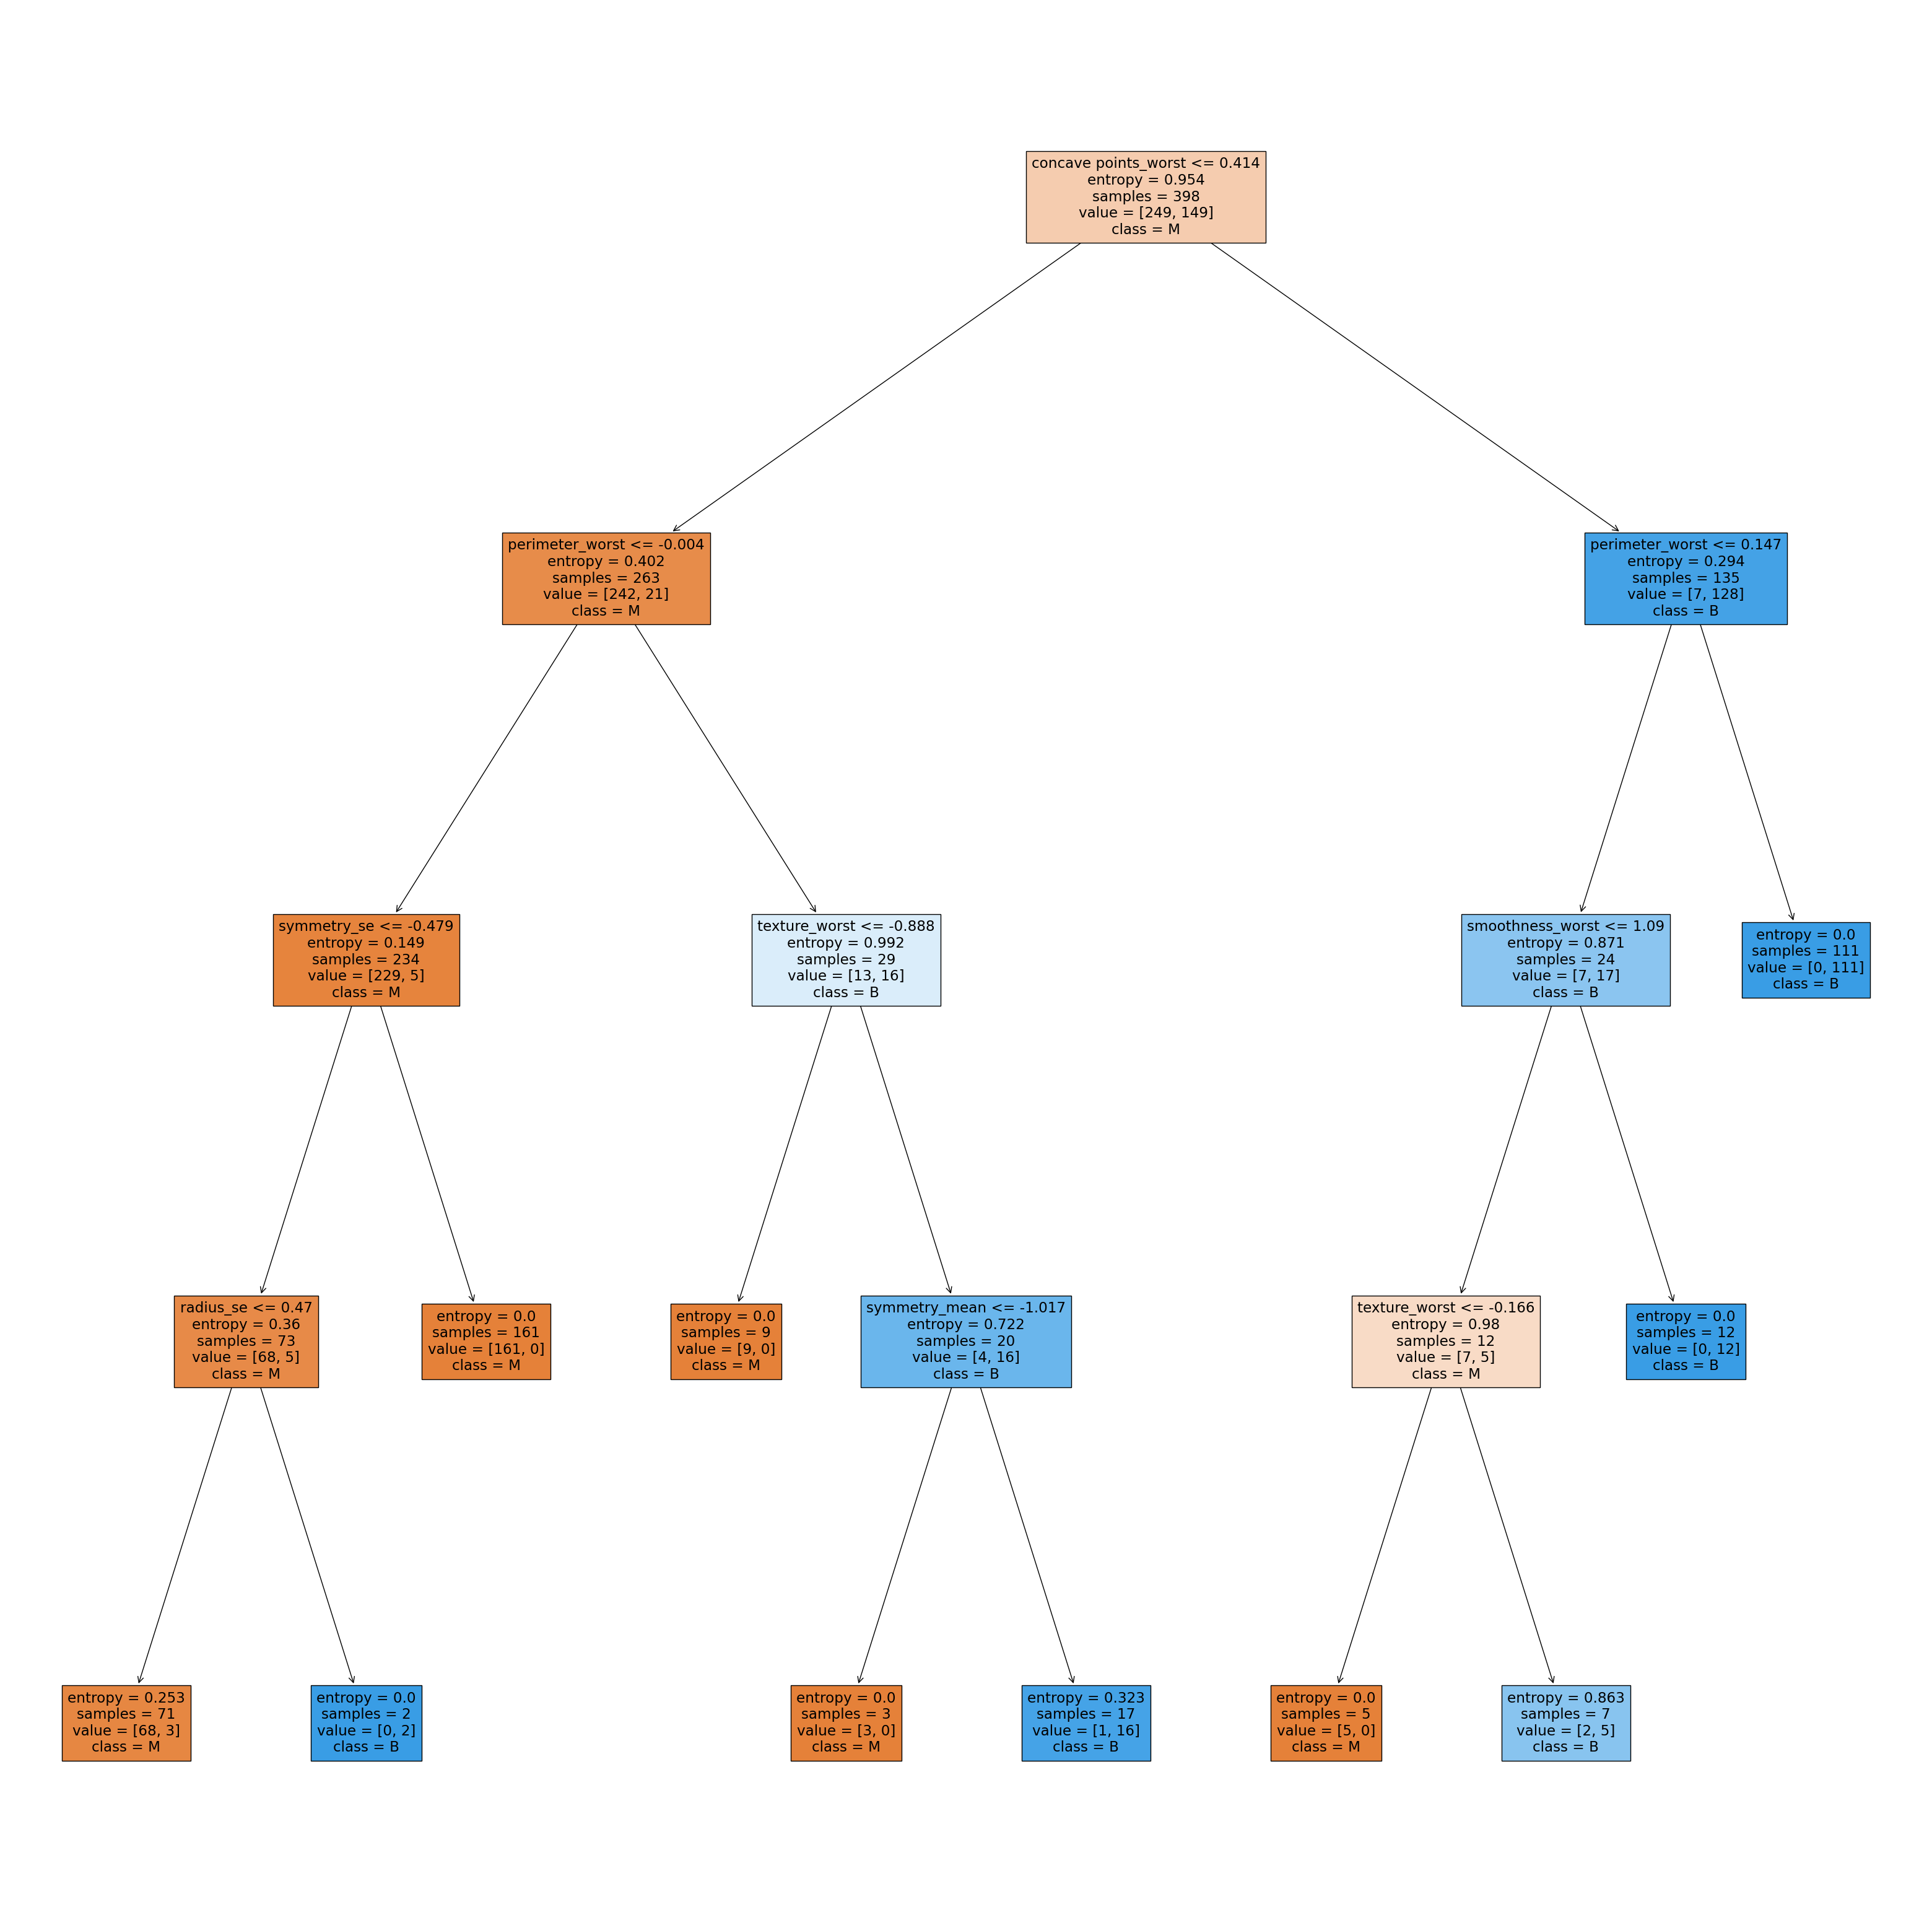

In [24]:
_, ax = plt.subplots(figsize=(40,40)) # Resize figure


tree_graph = plot_tree(tree_classifier,
                        feature_names=X.columns,
                        class_names=['M','B'],
                        ax=ax,
                        filled=True)


<a name="5.4"></a>
### 5.4. KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

[best_k, best_acc] = [0,0.0]


for k in range(4,7):
    # train model
    neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    # predict
    y_pred_KNN = neigh.predict(X_test)
    # medimos la precisión
    accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
    if accuracy_KNN > best_acc:
        [k,best_acc] = [k,accuracy_KNN] 
        
# guardamos el resultado
results['KNN'] = accuracy_KNN

print(f"La mejor precisión en el rango testeado se obtuvo para k = {k}")
        


La mejor precisión en el rango testeado se obtuvo para k = 6


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       108
           1       0.98      0.90      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion matrix, without normalization
[[107   1]
 [  6  57]]


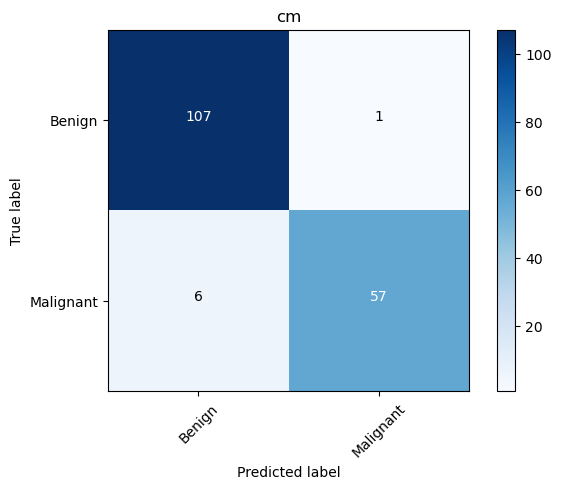

In [26]:
confusion_matrix_per_model(y_test,y_pred_KNN)

<a name="5.5"></a>
### 5.5. Red Neuronal

Por último implementaremos una red neuronal sencilla, tendrá:

- La capa de entrada

- Una capa completamete conectada con 16 neuronas y ReLU como activación.

- Dropout para regularizarización

- Otra capa completamete conectada con 16 neuronas y ReLU como activación.

- Dropout para regularización

- Una capa de salida con 1 neurona y sigmoide como activación (es un problema de clasificación con 2 clases)




In [27]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout


# ver los initializers

    
def model(input_dim):
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(16, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    return model
    
    


2023-06-09 17:37:28.946461: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 17:37:29.356854: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-09 17:37:29.358598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 17:37:30.820451: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Ahora instanciaremos el modelo y lo compilaremos usando:
    
- pérdida: binary_crossentropy, pues es un problema de 2 clases
    
- Optimizador: Adam

- Métricas: Accuracy

In [28]:
model = model(30)

 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 


Finalmente, entrenamos el modelo durante 30 epochs.

In [29]:
model.fit(X_train, y_train, epochs=30)
 
# evaluamos el modelo
scores = model.evaluate(X_test, y_test)

# guardamos el resultado
results['NN'] = scores[1]

Epoch 1/30
13/13 [==============================] - 1s 2ms/step - loss: 0.5699 - accuracy: 0.7538
Epoch 2/30
13/13 [==============================] - 0s 1ms/step - loss: 0.4650 - accuracy: 0.8593
Epoch 3/30
13/13 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.9045
Epoch 4/30
13/13 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.9020
Epoch 5/30
13/13 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.9171
Epoch 6/30
13/13 [==============================] - 0s 2ms/step - loss: 0.2538 - accuracy: 0.9296
Epoch 7/30
13/13 [==============================] - 0s 1ms/step - loss: 0.2138 - accuracy: 0.9372
Epoch 8/30
13/13 [==============================] - 0s 1ms/step - loss: 0.1901 - accuracy: 0.9472
Epoch 9/30
13/13 [==============================] - 0s 2ms/step - loss: 0.1908 - accuracy: 0.9447
Epoch 10/30
13/13 [==============================] - 0s 1ms/step - loss: 0.1684 - accuracy: 0.9548
Epoch 11/30
13/13 [

6/6 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion matrix, without normalization
[[106   2]
 [  3  60]]


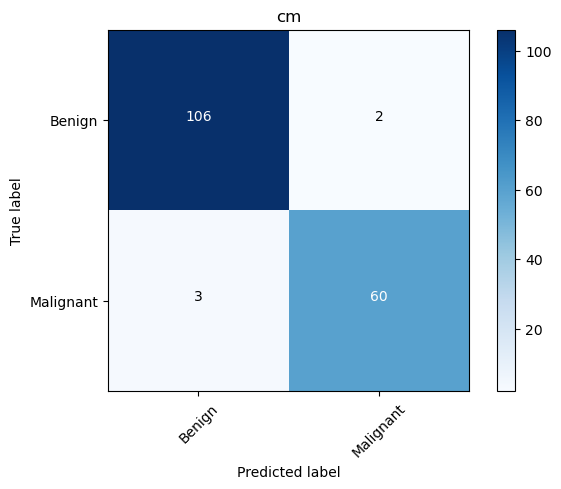

In [30]:
y_pred_NN = model.predict(X_test)

y_pred_NN = y_pred_NN > 0.5

confusion_matrix_per_model(y_test,y_pred_NN)

<a name="6"></a>
## 6. Análisis de resultados

Comparemos los resultados obtenidos.

In [31]:
pd.DataFrame(list(results.items()),
                   columns=['Algoritmo', 'Accuracy']).sort_values(by=['Accuracy'],ascending=False)

,Algoritmo,Accuracy
0,LR,0.976608
4,NN,0.970760
1,SVM,0.959064
3,KNN,0.959064
2,Decision Tree,0.947368


Al ser un problema simple todos los classificadores obtuvieron una buena performance sin necesitar de un ajuste fino. <br>
LR obtuvo los mejores resultados y tiene la ventaja adicional de ser un modelo sencillo.


<a name="7"></a>
## 7. Conclusiones

Se practicó con el pre-procesamiento de datos y la implementación de diferentes modelos de clasificación. <br>
Dada la sencillez del problema se obtuvieron buenos resultados con todos los clasificadores sin la necesidad de un ajuste demasiado fino de los hiperparámetros.



In [1]:
l = [{'a',3}, {'a':4}]

In [ ]:
for i in l:
    if l